# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Original image shape = (39209, 2)
Image coordinate shape: (39209, 4)


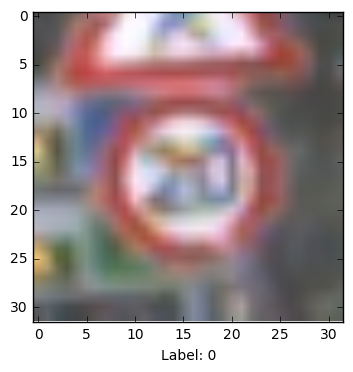

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
%matplotlib inline

print("Original image shape =", train["sizes"].shape)
print("Image coordinate shape:", train["coords"].shape)
 
#plot image helper function
def plot_images(images, labels, cls_pred=None):
    # Plot image.
    plt.imshow(images, cmap='binary')
 
    # Show true and predicted classes.
    if cls_pred is None:
        xlabel = "Label: {0}".format(labels)
    else:
        xlabel = "Label: {0}, Pred: {1}".format(labels, cls_pred)
 
    plt.xlabel(str(xlabel))
 
    # Remove ticks from the plot.
#     plt.xticks([])
#     plt.yticks([])
       
 
plot_images(X_train[0], y_train[0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import numpy as np
import pandas as pd
import cv2
 
#convert RGB to gray
features_train = []
features_test = []
 
for i, each in enumerate(X_train):
    each =  cv2.cvtColor(each, cv2.COLOR_BGR2GRAY)
    each = each.reshape([32, 32, 1])
    features_train.append(each)
features_train = np.asarray(features_train)/255
 
for i, each in enumerate(X_test):
    each = cv2.cvtColor(each, cv2.COLOR_BGR2GRAY)
    each = each.reshape([32, 32, 1])
    features_test.append(each)
features_test = np.asarray(features_test)/255

# read and count number of sign names for each class
label_names = pd.read_csv("signnames.csv")
label_names.head(5)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [5]:
# count number of signs for each sign name


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** Images are first converted from RGB 3 channels to gray scale one channel, then images are divided by 255 to normalize between 0 and 1. The size of images are also reshaped to (32, 32, 1) for easy processing with tensorflow. Data set features were split into training and validation set with validation set size at least 3000 to ensure a 1% true accuracy. Data set labels were one-hot encoded using sklearn LabelBinarizer method.

In [6]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Turn labels into numbers and apply One-Hot Encoding
from sklearn.preprocessing import LabelBinarizer
 
encoder = LabelBinarizer()
encoder.fit(y_train)
labels_train = encoder.transform(y_train)
encoder = LabelBinarizer()
encoder.fit(y_test)
labels_test = encoder.transform(y_test)
 
# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
labels_train = labels_train.astype(np.float32)
labels_test = labels_test.astype(np.float32)
is_labels_encod = True
 
print('Labels One-Hot Encoded')
print(labels_train.shape)
print(labels_test.shape)
 



Labels One-Hot Encoded
(39209, 43)
(12630, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** Validation data is extraced from training data using sklearn train_test_split method with test_size 20 percent of original training data to ensure validation data size is at least 3000. No additional data is generated below with this commit, maybe rotating, cropping the image will provide more data to gain better accuracy

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [8]:
# split training and validation data
# Get randomized datasets for training and validation
# Validation data set at least 3000 to guarantee a 1% true accuracy
from sklearn.model_selection import train_test_split
 
features_train, features_valid, labels_train, labels_valid = train_test_split(
    features_train,
    labels_train,
    test_size=0.2)
 
print('Training features and labels randomized and split.')
print("Training set features and labels size:", features_train.shape, labels_train.shape)
print("Validation set features and labels size:", features_valid.shape, labels_valid.shape)



Training features and labels randomized and split.
Training set features and labels size: (31367, 32, 32, 1) (31367, 43)
Validation set features and labels size: (7842, 32, 32, 1) (7842, 43)


In [9]:
# 2-layer CNN followed by 2 fully-connected layer

# import libraries
import time
from datetime import timedelta
import math
import tensorflow as tf

# configurations of CNN
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# data dimensions
img_size = 32
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 43

# helper-functions 
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_conv_layer(input, num_input_channels, filter_size, num_filters, keep_prob, use_pooling=True):
    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape)
    biases = new_biases(length=num_filters)
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1,1,1,1], padding='SAME')
    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    layer = tf.nn.relu(layer)
    layer = tf.nn.dropout(layer, keep_prob)
    return layer, weights

def flatten_layer(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features

def new_fc_layer(input, num_inputs, num_outputs, use_relu=True):
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Flow graph is defined as below. It's a basic 2-layer CNN with keep_prob rate equals to 0.7 followed by 2 fully connected layers. The filter size for both CNN is 5x5. The first convnet channel is 16, second convnet channel is 36, first fully connected layer has 128 neurons. Both convnets use same padding, have strides equal to (1,1,1,1) and use max pooling with strides equal to (1,2,2,1). 

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

## Tensor flow graph

# placeholder variables

x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# Convnet 1
convnet1, weights1 = new_conv_layer(input=x, num_input_channels=num_channels, filter_size=filter_size1, num_filters=num_filters1, keep_prob=0.7, use_pooling=True)

# Connvet 2
convnet2, weights2 = new_conv_layer(input=convnet1, num_input_channels=num_filters1, filter_size=filter_size2, num_filters=num_filters2, keep_prob=0.7, use_pooling=True)

# Flatten convnet 2
layer_flat, num_features = flatten_layer(convnet2)

# FC1
fc1 = new_fc_layer(input=layer_flat, num_inputs=num_features, num_outputs=fc_size, use_relu=False)

# FC2
fc2 = new_fc_layer(input=fc1, num_inputs=fc_size, num_outputs=num_classes, use_relu=False)

# predicted label
y_pred = tf.nn.softmax(fc2)
y_pred_cls = tf.argmax(y_pred, 1)

print("Convnet 1 shape:", convnet1)
print("Convnet 2 shape:", convnet2)
print("Flattened Convnet2 shape:", layer_flat)
print("FC1 shape:", fc1)
print("FC2 shape:", fc2)

Convnet 1 shape: Tensor("dropout/mul:0", shape=(?, 16, 16, 16), dtype=float32)
Convnet 2 shape: Tensor("dropout_1/mul:0", shape=(?, 8, 8, 36), dtype=float32)
Flattened Convnet2 shape: Tensor("Reshape:0", shape=(?, 2304), dtype=float32)
FC1 shape: Tensor("add_2:0", shape=(?, 128), dtype=float32)
FC2 shape: Tensor("add_3:0", shape=(?, 43), dtype=float32)


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** AdamOptimizer, an advanced grandient descent optimizer is used with learning rate equal to 0.0001. 100 iteration are made with batch size equal to 128 in each iteration.

In [11]:
# optimization
learning_rate = 0.0001
epoches = 100
batch_size = 128

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc2, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# tensorflow run
# open and init session
session = tf.Session()
session.run(tf.initialize_all_variables())

# randomly select batches from train data
def random_batch(features, labels):
    # Number of images in the training-set.
    num_images = len(features)
 
    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)
 
    # Use the random index to select random images and labels.
    features_batch = features[idx, ]
    labels_batch = labels[idx, ]
    return features_batch, labels_batch

feed_dict_validation = {x: features_valid, y_true: labels_valid}
feed_dict_test = {x: features_test, y_true: labels_test}

for i in range(epoches):
    start_time = time.time()
    total_batch = int(features_train.shape[0]/batch_size)
    for j in range(total_batch):
        batch_x, batch_y = random_batch(features_train, labels_train)
        feed_dict_train = {x: batch_x, y_true: batch_y}
        session.run(optimizer, feed_dict=feed_dict_train)
        acc_train = session.run(accuracy, feed_dict=feed_dict_train)
        
    acc_validation = session.run(accuracy, feed_dict=feed_dict_validation)
    acc_test = session.run(accuracy, feed_dict =feed_dict_test)
    end_time = time.time()
    time_diff = end_time - start_time
    print("Epoch:", i)
    print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))
    print("training accuracy is:", acc_train)
    print("validation set accuracy is:", acc_validation)
    print("test set accuracy is:", acc_test)

Epoch: 0
Time usage: 0:02:02
training accuracy is: 0.0859375
validation set accuracy is: 0.0992094
test set accuracy is: 0.0976247
Epoch: 1
Time usage: 0:01:53
training accuracy is: 0.21875
validation set accuracy is: 0.1696
test set accuracy is: 0.14426
Epoch: 2
Time usage: 0:01:50
training accuracy is: 0.265625
validation set accuracy is: 0.293548
test set accuracy is: 0.257403
Epoch: 3
Time usage: 0:01:49
training accuracy is: 0.46875
validation set accuracy is: 0.423106
test set accuracy is: 0.372763
Epoch: 4
Time usage: 0:01:49
training accuracy is: 0.46875
validation set accuracy is: 0.514027
test set accuracy is: 0.464529
Epoch: 5
Time usage: 0:01:49
training accuracy is: 0.632812
validation set accuracy is: 0.590538
test set accuracy is: 0.521378
Epoch: 6
Time usage: 0:01:50
training accuracy is: 0.664062
validation set accuracy is: 0.649197
test set accuracy is: 0.574426
Epoch: 7
Time usage: 0:01:48
training accuracy is: 0.695312
validation set accuracy is: 0.683117
test set a

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** I tried a basic linear neural network with a relu first, which yields training and validation accuracy less than 10%. Second try, I added another hidden layer but still accuracy is low less than 50%. Third try, I followed a youtube tensorflow tutorial and came up with this 2 layer CNN, i ran the network overnight and obtained the accuracy above.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

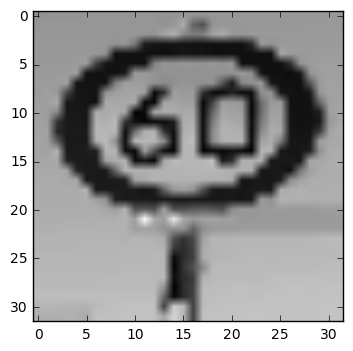

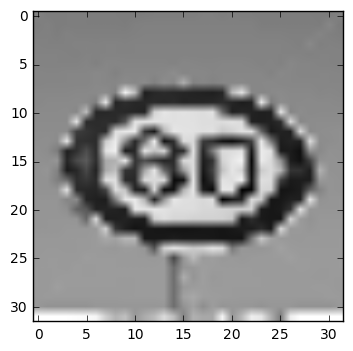

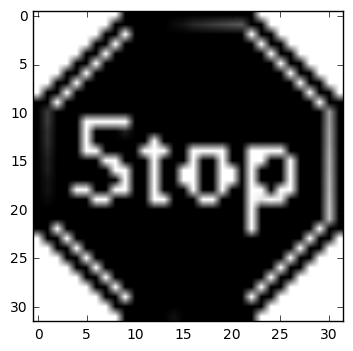

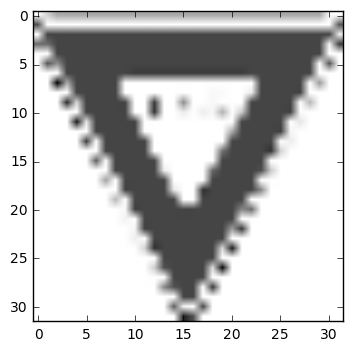

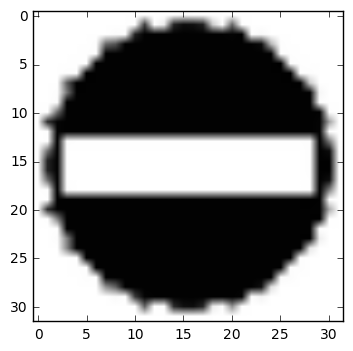

(1, 32, 32, 1)


In [61]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2

img1 = mpimg.imread("traffic-signs-data/60kmh.jpg")
img2 = mpimg.imread("traffic-signs-data/80kmh.jpg")
img3 = mpimg.imread("traffic-signs-data/stop.jpg")
img4 = mpimg.imread("traffic-signs-data/yield.jpg")
img5 = mpimg.imread("traffic-signs-data/no entry.jpg")
img = np.array([img1, img2, img3, img4, img5])
label = ["60kmh", "80kmh", "stop", "yield", "no entry"]

for i, each in enumerate(img):
    each = cv2.cvtColor(each, cv2.COLOR_BGR2GRAY)
    each = cv2.resize(each, (32, 32))
    plt.imshow(each, cmap='gray')
    plt.show()
    img[i] = each.reshape([1, 32, 32, 1])
print(img[0].shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** These 5 pictures are downloaded online. A blurrer image should make the classification difficult, also the training images seem all taken on a road with an angle, a normal image facing upfront may be somehow difficult to classify since no such training data provided which also suggests that more data should be generated from image augumation as suggested in question 2.

In [111]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

for i in range(5):
    classification = session.run(y_pred_cls, feed_dict={x: img[i]})
    predicted_label = label_names[label_names["ClassId"]==int(classification)]["SignName"].values
    true_label = label[i]
    print("True label:\t\t", true_label)
    print("Predicted label:\t", predicted_label)

True label:		 60kmh
Predicted label:	 ['No passing']
True label:		 80kmh
Predicted label:	 ['Speed limit (80km/h)']
True label:		 stop
Predicted label:	 ['Stop']
True label:		 yield
Predicted label:	 ['Yield']
True label:		 no entry
Predicted label:	 ['No entry']


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** 4 out of 5 are predicted correctly considering the test accuracy of 0.89 with the testing set, I think this result makes sense. A live camera stream will probably be more accurate.

sign 60kmh top 6 softmax probabilities are 
 [[ 0.06078678  0.02236221  0.02236221  0.02236221  0.02236221  0.02236221]]
 with indices [[9 0 1 2 3 4]]




/Users/yifei/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5882: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 6)
  '(shape is %d x %d)' % inp.shape[::-1])


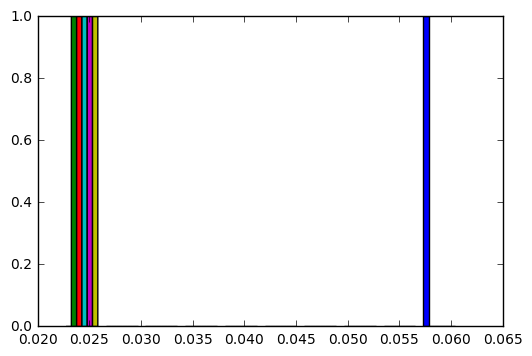

sign 80kmh top 6 softmax probabilities are 
 [[ 0.06078678  0.02236221  0.02236221  0.02236221  0.02236221  0.02236221]]
 with indices [[14  0  1  2  3  4]]




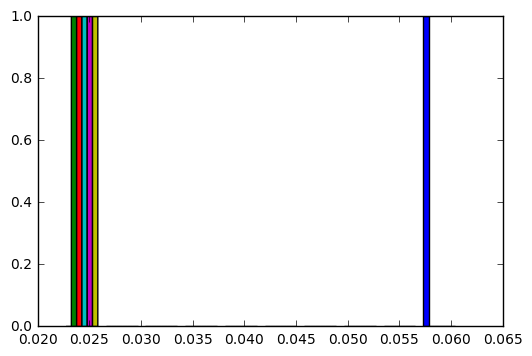

sign stop top 6 softmax probabilities are 
 [[ 0.06078678  0.02236221  0.02236221  0.02236221  0.02236221  0.02236221]]
 with indices [[17  0  1  2  3  4]]




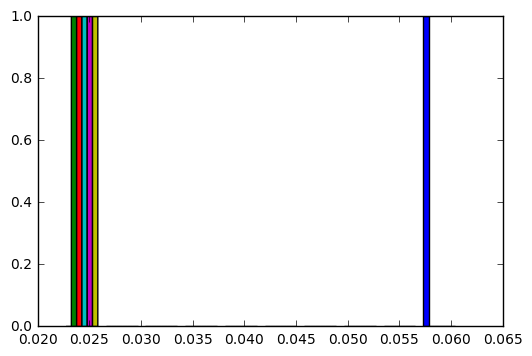

sign yield top 6 softmax probabilities are 
 [[ 0.06078678  0.02236221  0.02236221  0.02236221  0.02236221  0.02236221]]
 with indices [[13  0  1  2  3  4]]




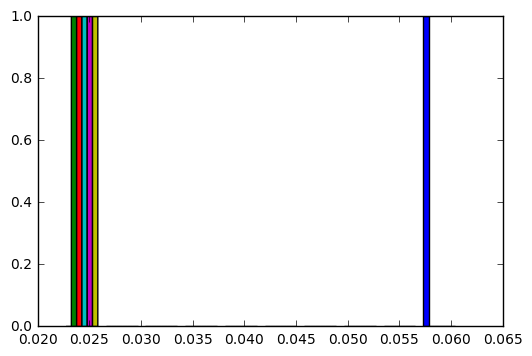

sign no entry top 6 softmax probabilities are 
 [[ 0.06078678  0.02236221  0.02236221  0.02236221  0.02236221  0.02236221]]
 with indices [[17  0  1  2  3  4]]




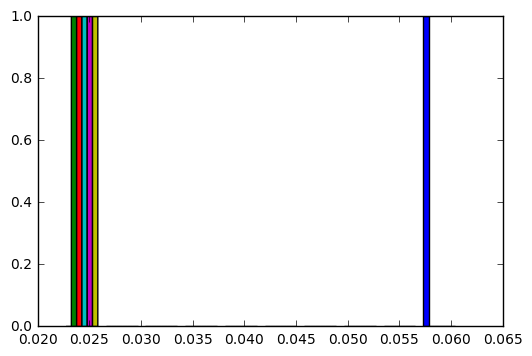

In [115]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

for i in range(5):
    values, indices = session.run(tf.nn.top_k(tf.nn.softmax(y_pred.eval(feed_dict={x: img[i]}, session=session)), k=6))
    print("sign {0} top 6 softmax probabilities are \n {1}\n with indices {2}". format(label[i], values, indices))
    print("\n")
    plt.hist(values)
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** I printed out top 6 softmax probabilities for each image. First one is predicted wrong but correct prediction does appear at position 5. Other 4 all predicted correctly and the probabilities for correct prediction are all around 6%.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** Images are first read into a numpy array and then converted from RGB to grayscale using cv2 module. Same are then reshaped to size (1, 32, 32, 1) which will be fed to the tensorflow graph. Predictions are made by running the prediction flow.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.